In [ ]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_pak = df[(df['job_country']=='Pakistan')&(df['job_title_short']=='Data Analyst')]


In [24]:
df_pak

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
13380,Data Analyst,Manager Research & Data Analytics,"Karachi, Pakistan",via LinkedIn,Full-time,False,Pakistan,2023-09-13 13:14:15,False,False,Pakistan,None,NaN,NaN,K-Electric,"[excel, sap]","{'analyst_tools': ['excel', 'sap']}"
13941,Data Analyst,Data Analyst,Pakistan,via Trabajo.org,Full-time,False,Pakistan,2023-02-28 13:15:04,False,False,Pakistan,None,NaN,NaN,S&P Global,"[sql, vba]","{'programming': ['sql', 'vba']}"
17263,Data Analyst,Junior Data Analyst,"Karachi, Pakistan",via Indeed,Full-time,False,Pakistan,2023-12-21 13:39:19,True,False,Pakistan,None,NaN,NaN,Service Industry - Marketing & Events,"[sql, nosql, azure, gcp, spark, excel]","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
18917,Data Analyst,Data Analyst,"Quetta, Pakistan",via LinkedIn,Contractor,False,Pakistan,2023-06-08 13:36:34,False,False,Pakistan,None,NaN,NaN,MicroMerger (Pvt.) Ltd.,None,None
21254,Data Analyst,Data Migration Analyst,Pakistan,via LinkedIn,Full-time,False,Pakistan,2023-04-11 14:14:21,True,False,Pakistan,None,NaN,NaN,InfoTech Group,"[sql, sql server, oracle, unix, windows]","{'cloud': ['oracle'], 'databases': ['sql serve..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778921,Data Analyst,Data Analyst (Fresh),Pakistan,via LinkedIn,Full-time,False,Pakistan,2023-10-12 05:17:29,False,False,Pakistan,None,NaN,NaN,HR Ways - Hiring Tech Talent,[php],{'programming': ['php']}
779015,Data Analyst,Data Analyst,Anywhere,via LinkedIn,Full-time,True,Pakistan,2023-12-13 05:32:19,False,False,Pakistan,None,NaN,NaN,Truelancer.com,None,None
782651,Data Analyst,"Senior QA Analyst [SQL, REST API, ETL, BI, Dat...",Anywhere,via LinkedIn Pakistan,Full-time,True,Pakistan,2023-01-20 07:02:00,True,False,Pakistan,None,NaN,NaN,Alex Solutions,"[sql, oracle, aws, azure, unix, jira, confluence]","{'async': ['jira', 'confluence'], 'cloud': ['o..."
783302,Data Analyst,Data Analyst,Anywhere,via LinkedIn Pakistan,Full-time,True,Pakistan,2023-01-16 06:16:53,True,False,Pakistan,None,NaN,NaN,HR Ways - Hiring Tech Talent,"[sql, vba, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


In [6]:
df_pak['job_title_short'].value_counts()

job_title_short
Data Analyst    259
Name: count, dtype: int64

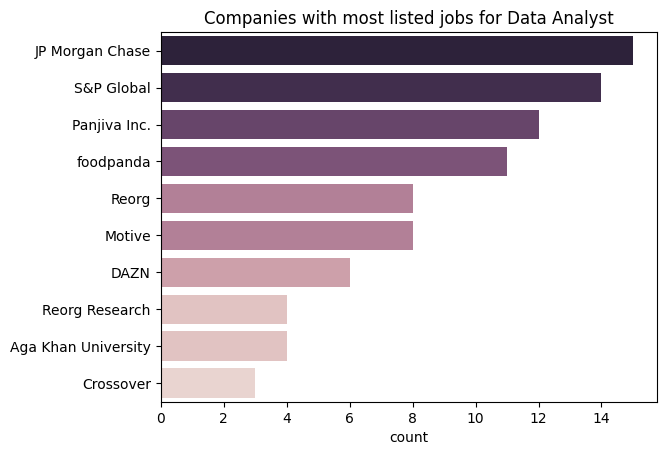

In [17]:
df_pak_plot = df_pak['company_name'].value_counts().head(10).to_frame()

sns.barplot(data=df_pak_plot,x='count',y='company_name',hue='count')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('Companies with most listed jobs for Data Analyst')
plt.show()

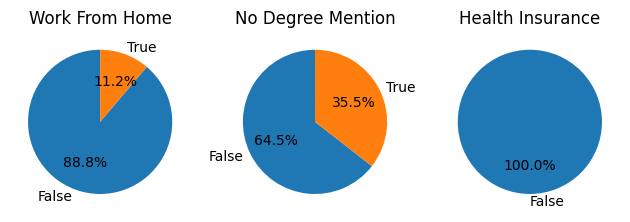

In [22]:
dict_bool = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'No Degree Mention',
    'job_health_insurance':'Health Insurance'
}

fig,ax = plt.subplots(1,3)

for i,(col,tit) in enumerate(dict_bool.items()):
    counts= df_pak[col].value_counts()
    ax[i].pie(counts.values,startangle=90,autopct='%1.1f%%',labels=counts.index)
    ax[i].set_title(tit)

fig.tight_layout()
plt.show()

In [27]:
df_pak_plot=df_pak['job_location'].value_counts().head(10).to_frame()
df_pak_plot

,count
job_location,
Pakistan,117
"Lahore, Pakistan",34
"Islamabad, Pakistan",30
Anywhere,29
"Karachi, Pakistan",26
"Hyderabad, Pakistan",9
"Rawalpindi, Pakistan",3
"Multan, Pakistan",3
"Faisalabad, Pakistan",2


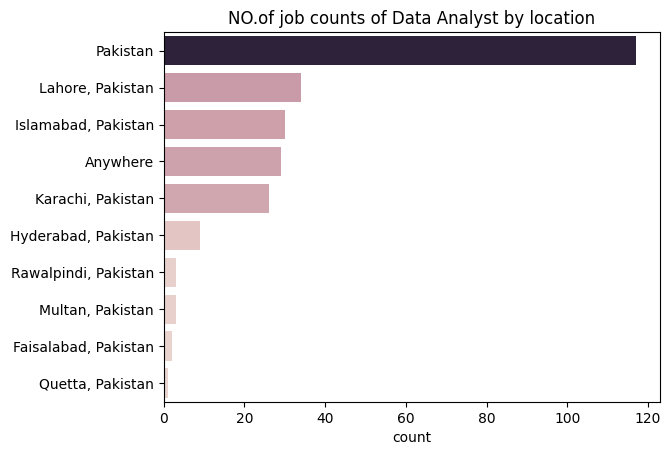

In [29]:
sns.barplot(data=df_pak_plot,x='count',y='job_location',hue='count')
plt.title('NO.of job counts of Data Analyst by location')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

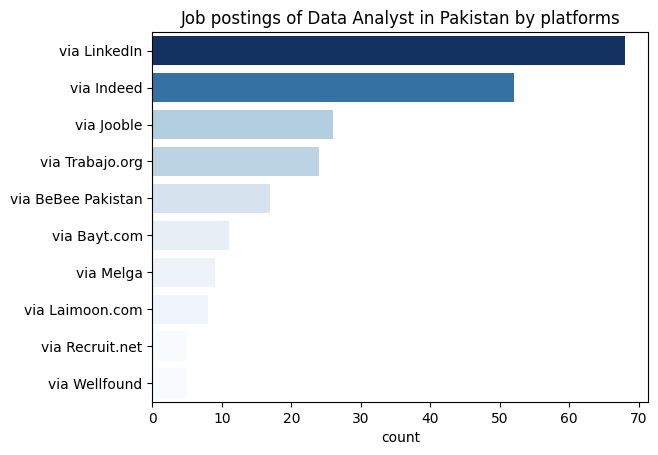

In [34]:
df_pak_plot = df_pak['job_via'].value_counts().head(10).to_frame()
sns.barplot(data=df_pak_plot,x='count',y='job_via',hue='count',palette="Blues")
plt.ylabel('')
plt.title('Job postings of Data Analyst in Pakistan by platforms')
plt.legend().set_visible(False)
plt.show()